# Data Visualization検証 - Electricity
* https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014

カラム内容の説明
```
Values are in kW of each 15 min. To convert values in kWh values must be divided by 4.
Each column represent one client. Some clients were created after 2011. In these cases consumption were considered zero.
All time labels report to Portuguese hour. However all days present 96 measures (24*4). Every year in March time change day (which has only 23 hours) the values between 1:00 am and 2:00 am are zero for all points. Every year in October time change day (which has 25 hours) the values between 1:00 am and 2:00 am aggregate the consumption of two hours.


Data set were saved as txt using csv format, using semi colon (;).
First column present date and time as a string with the following format 'yyyy-mm-dd hh:mm:ss'
Other columns present float values with consumption in kW


```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.manifold import TSNE

In [2]:
data_path = './data/LD2011_2014.txt'
df = pd.read_table(data_path, index_col=0, sep=';', decimal=',')

In [3]:
df.shape

(140256, 370)

In [4]:
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_zero_counts = (df == 0).sum(axis=0)

<AxesSubplot:>

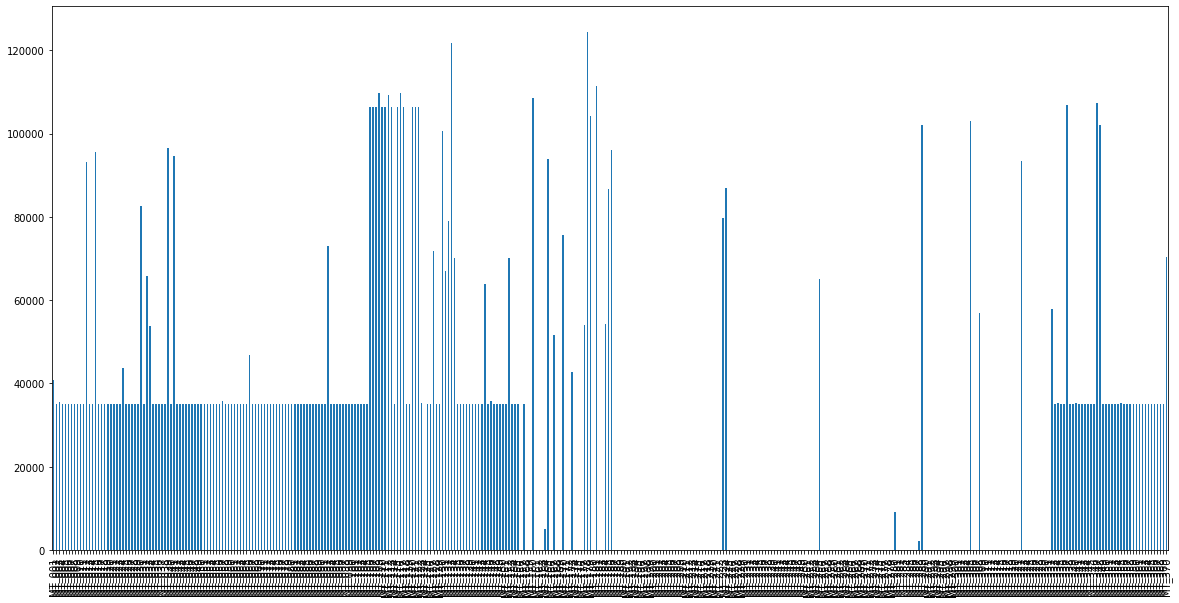

In [72]:
df_zero_counts.plot.bar(figsize=(20, 10))

<AxesSubplot:>

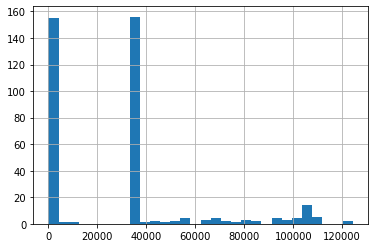

In [73]:
df_zero_counts.hist(bins=30)

<AxesSubplot:>

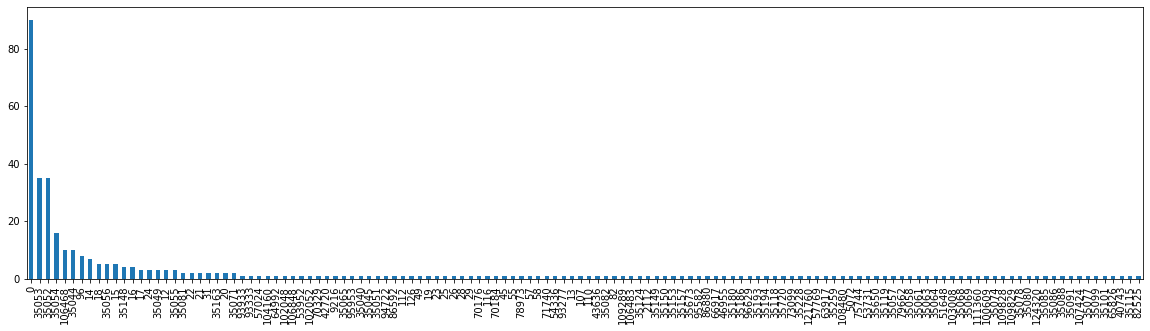

In [74]:
df_zero_counts.value_counts().plot.bar(figsize=(20,5))

In [10]:
df_150_group = df.columns[(df_zero_counts < 150).to_numpy()]

In [11]:
df_35000_group = df.columns[(df_zero_counts < 35100) & (df_zero_counts > 34900).to_numpy()]

In [12]:
df_106000_group = df.columns[(df_zero_counts < 107000) & (df_zero_counts > 105000).to_numpy()]

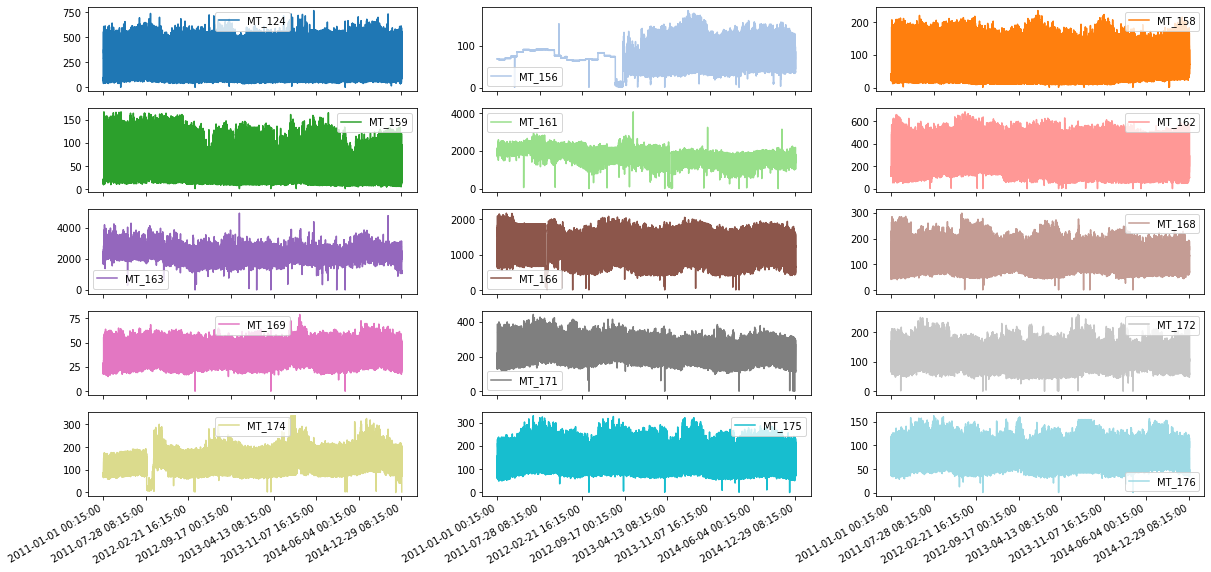

In [139]:
zero_index = (df[df_150_group].sum(axis=1) == 0)
df.loc[~zero_index, df_150_group[:15]].plot(subplots=True, layout=(-1, 3), figsize=(20, 10), cmap='tab20')
plt.show()

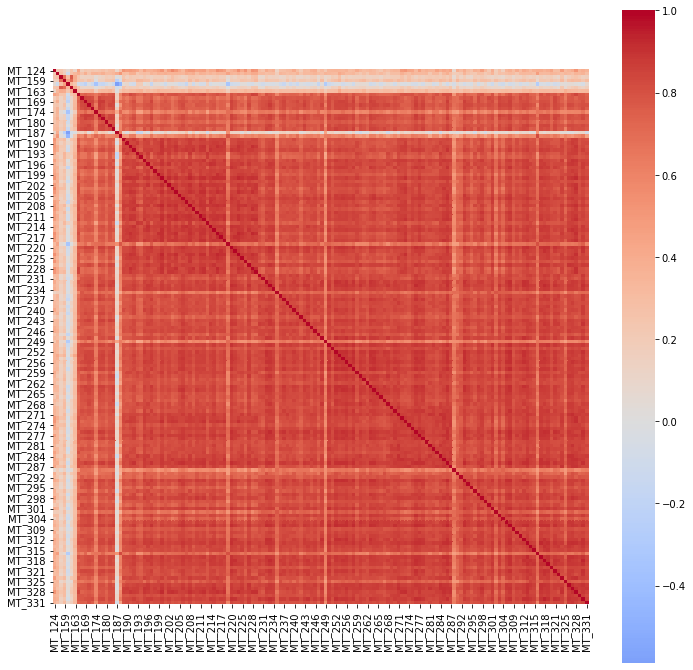

In [140]:
plt.figure(figsize=(12,12))
sns.heatmap(df.loc[~zero_index, df_150_group].corr(), center=0, cmap='coolwarm', square=True)
plt.show()

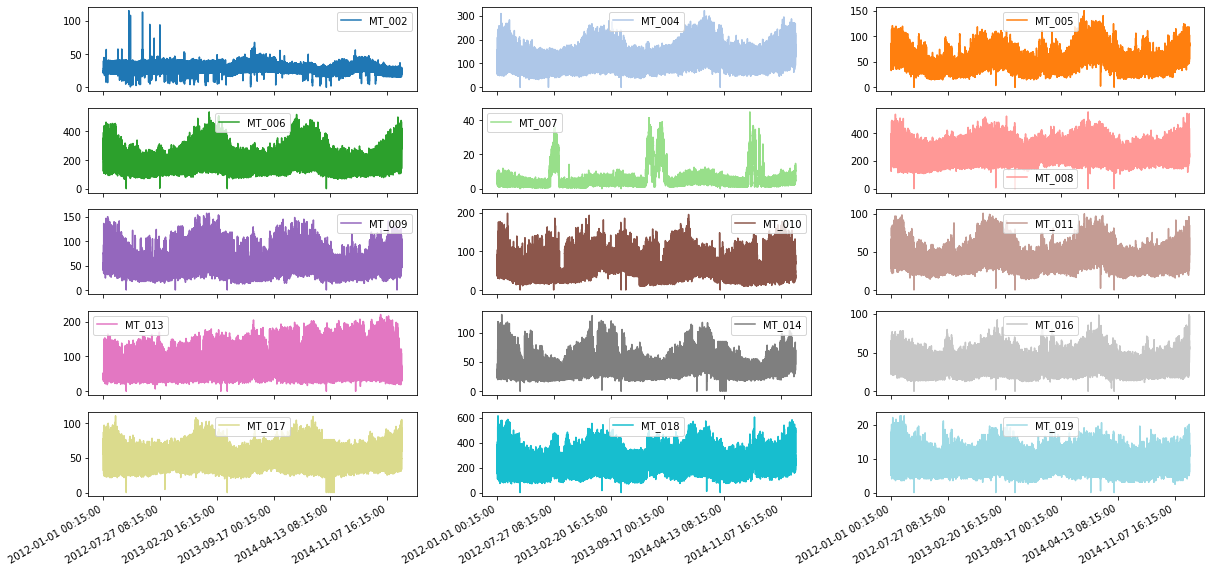

In [137]:
zero_index = (df[df_35000_group].sum(axis=1) == 0)
df.loc[~zero_index, df_35000_group[:15]].plot(subplots=True, layout=(-1, 3), figsize=(20, 10), cmap='tab20')
plt.show()

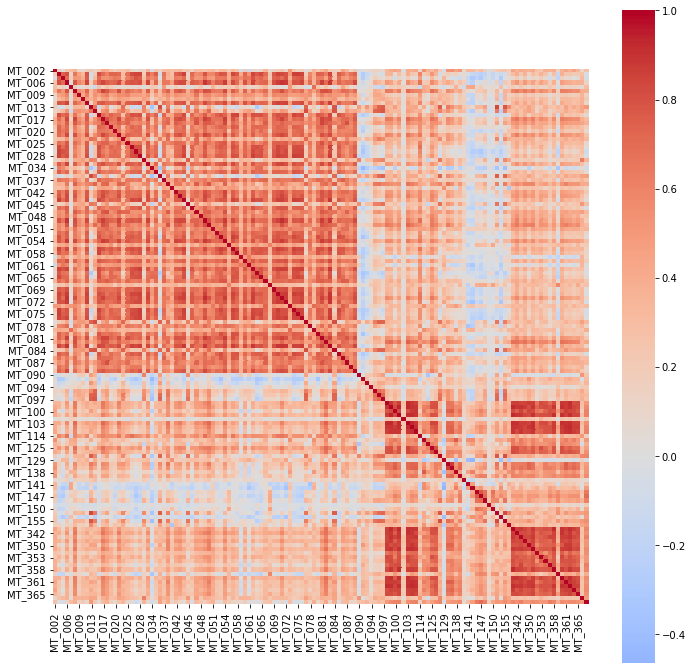

In [138]:
plt.figure(figsize=(12,12))
sns.heatmap(df.loc[~zero_index, df_35000_group].corr(), center=0, cmap='coolwarm', square=True)
plt.show()

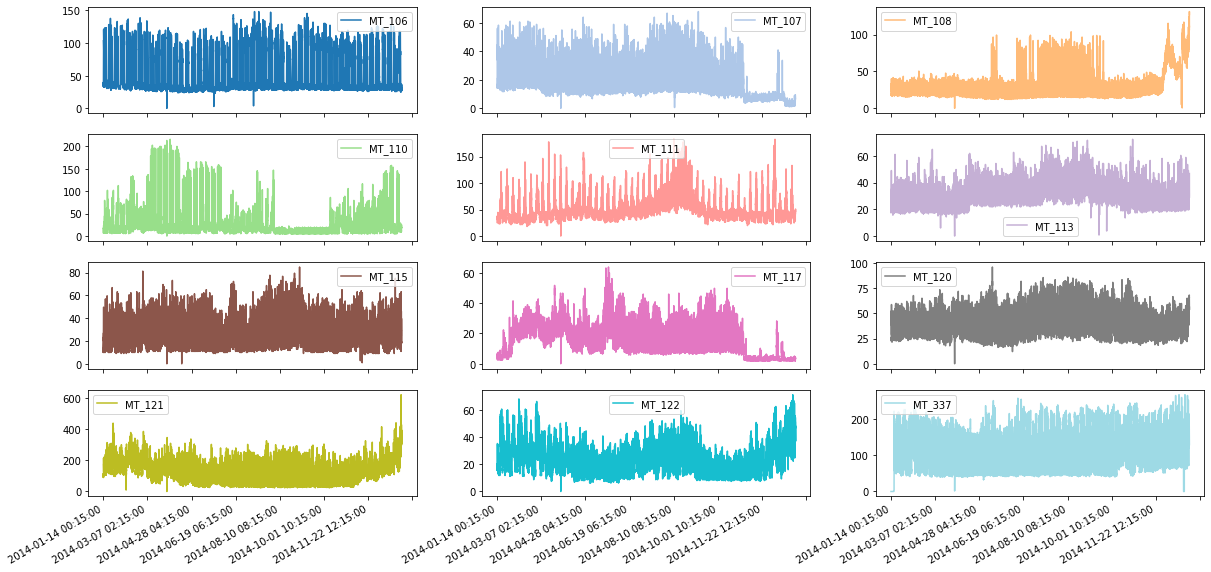

In [131]:
zero_index = (df[df_106000_group].sum(axis=1) == 0)
df.loc[~zero_index, df_106000_group[:15]].plot(subplots=True, layout=(-1, 3), figsize=(20, 10), cmap='tab20')
plt.figplt.show()

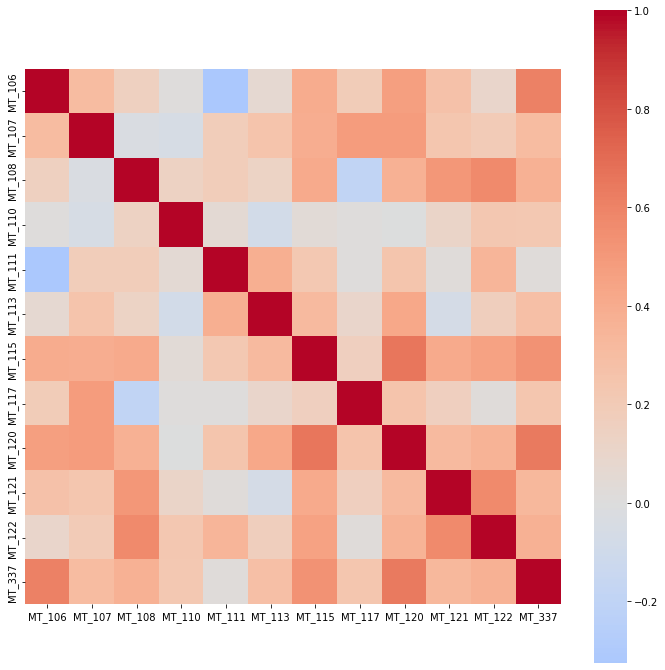

In [134]:
plt.figure(figsize=(12,12))
sns.heatmap(df.loc[~zero_index, df_106000_group].corr(), center=0, cmap='coolwarm', square=True)
plt.show()

In [129]:
def viz_histgram(df, df_group, size=15):
    viz_columns = df_group[:size]
    nrows = math.ceil(len(viz_columns)/3)
    # drop 0 value rows 
    zero_index = (df[viz_columns].sum(axis=1) == 0)
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,3*nrows))
    cmap = plt.get_cmap("tab20")
    for i, c in enumerate(viz_columns):
        ax = axes[i // 3, i % 3]
        df.loc[~zero_index, c].plot.hist(
            subplots=True, cmap='tab20', bins=20, ax=ax, color=cmap(i)
        )
    plt.show()

/home/jovyan/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/home/jovyan/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


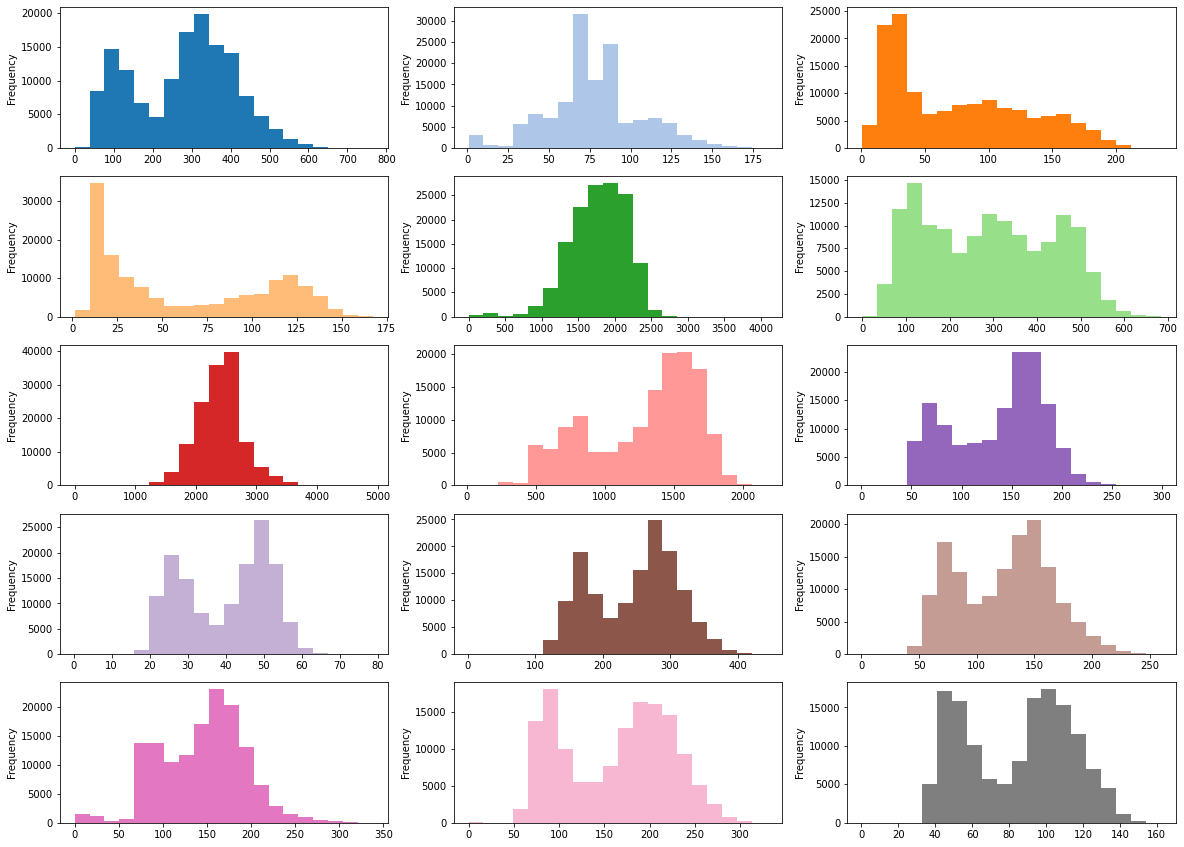

In [130]:
viz_histgram(df, df_150_group)

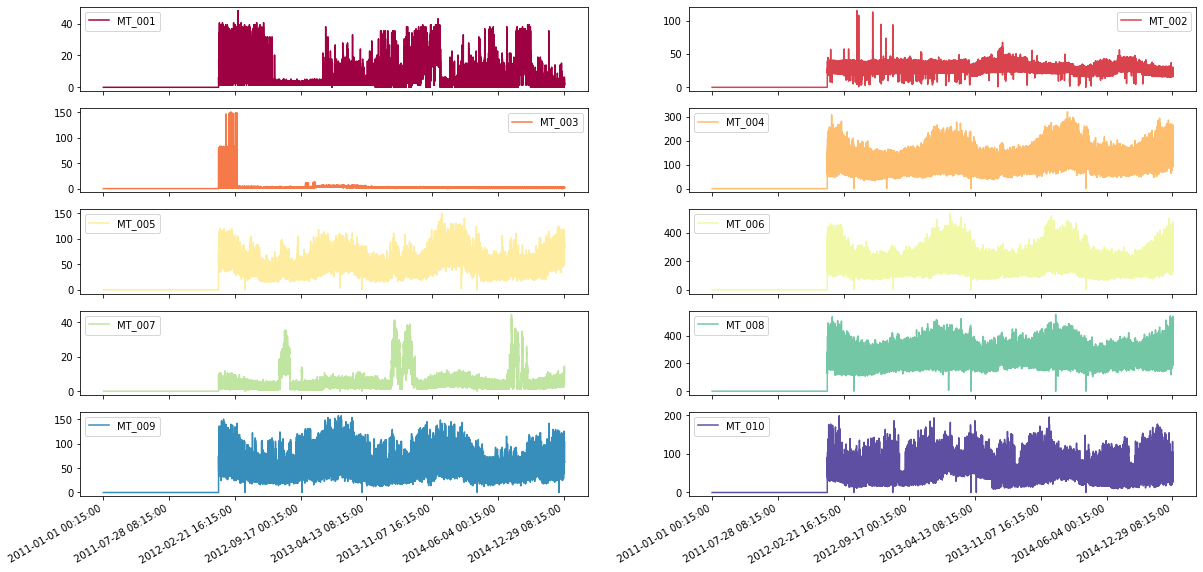

In [6]:
df[df.columns[:10]].plot(cmap='Spectral', figsize=(20, 10), subplots=True, layout=(-1, 2))
plt.show()

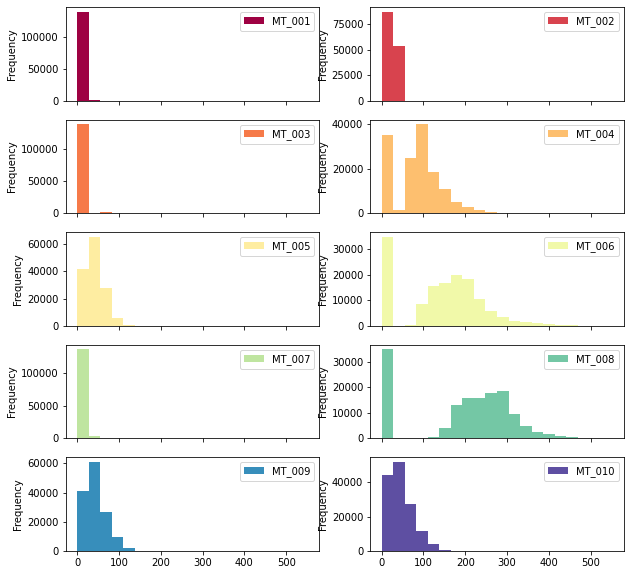

In [46]:
df[df.columns[:10]].plot.hist(
    figsize=(10, 10), subplots=True, layout=(-1, 2), bins=20, cmap='Spectral')
plt.show()

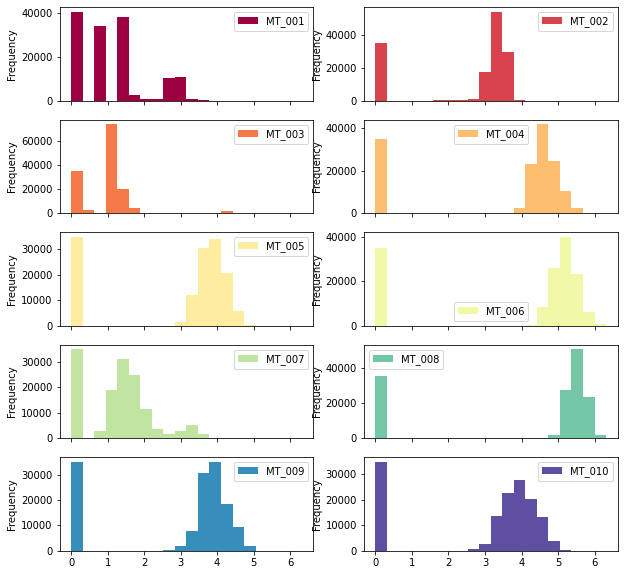

In [51]:
np.log1p(df[df.columns[:10]]).plot.hist(
    figsize=(10, 10), subplots=True, layout=(-1, 2), bins=20, cmap='Spectral')
plt.show()

In [52]:
stats_df = df.describe()

In [53]:
stats_df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


<AxesSubplot:xlabel='mean', ylabel='std'>

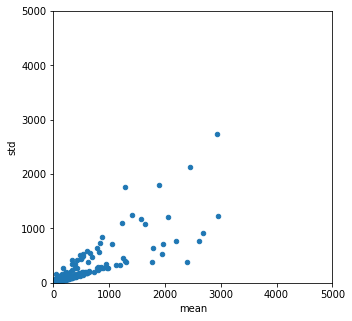

In [61]:
stats_df.T.plot.scatter(x='mean', y='std', figsize=(5, 5), xlim=(0, 5000), ylim=(0, 5000))

In [11]:
from scipy import fftpack

In [12]:
#FFT
sample_freq = fftpack.fftfreq(df.shape[0], d=1.0)
y_fft = fftpack.fft(df['MT_001'].to_numpy())
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(y_fft)[pidxs]
freq = freqs[power.argmax()]


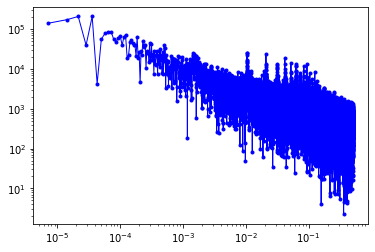

In [13]:
plt.loglog(freqs, power,'b.-',lw=1)

In [14]:
#FFT
sample_freq = fftpack.fftfreq(df.shape[0], d=1.0)
y_fft = fftpack.fft(df['MT_005'].to_numpy())
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(y_fft)[pidxs]
freq = freqs[power.argmax()]


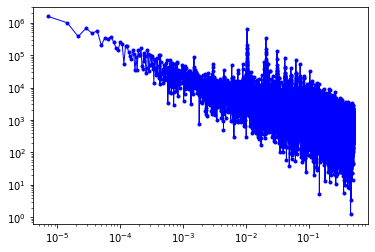

In [15]:
plt.loglog(freqs, power,'b.-',lw=1)

In [17]:
#FFT
sample_freq = fftpack.fftfreq(df.shape[0], d=1.0)
y_fft = fftpack.fft(df['MT_003'].to_numpy())
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(y_fft)[pidxs]
freq = freqs[power.argmax()]


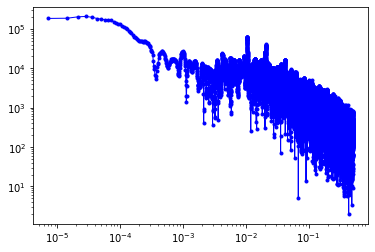

In [18]:
plt.loglog(freqs, power,'b.-',lw=1)

## 相関系でみてみる

<AxesSubplot:>

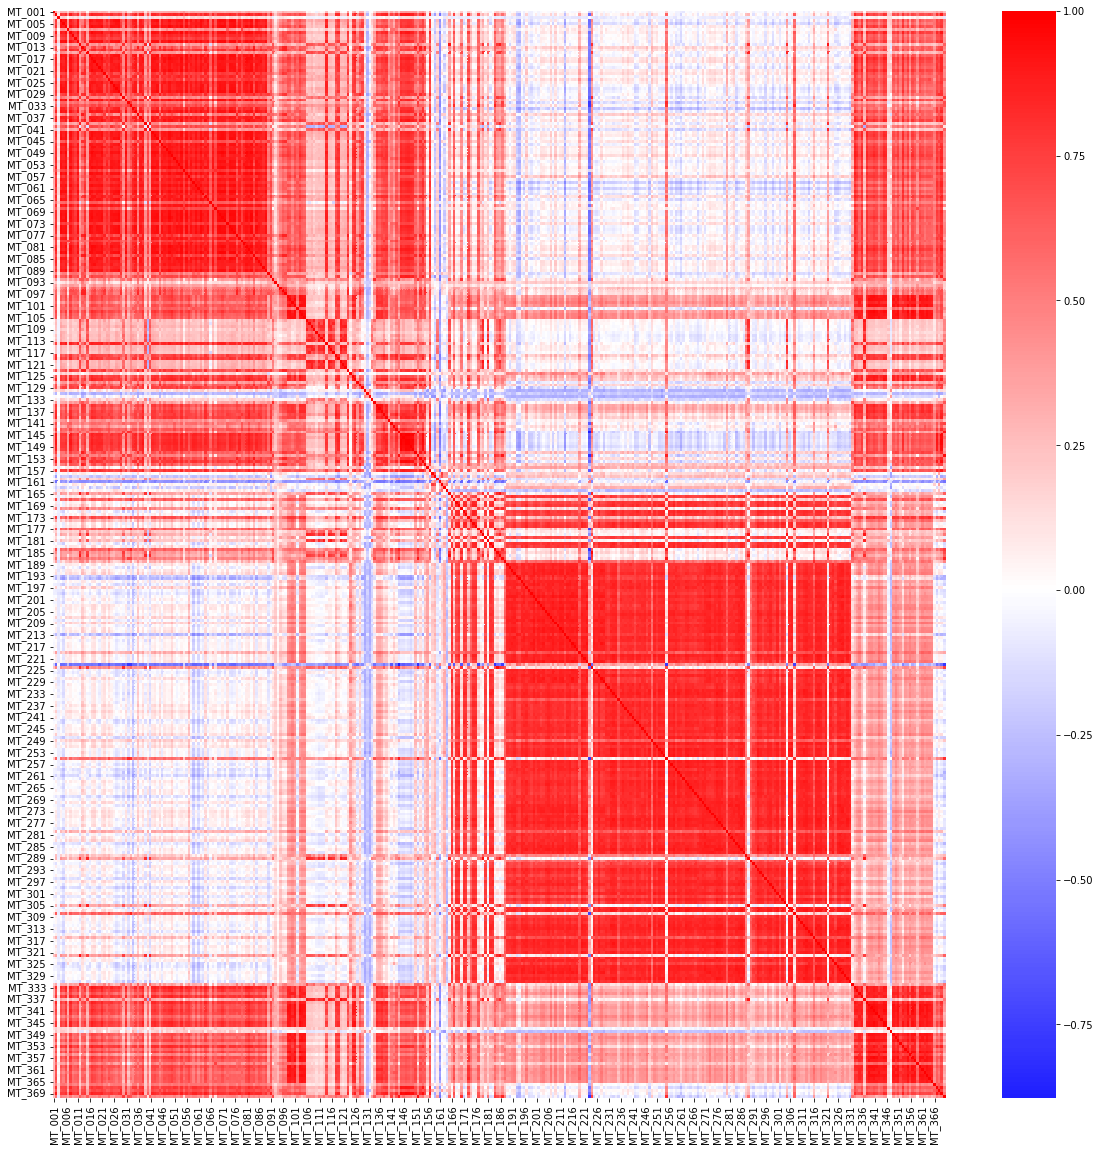

In [13]:
plt.figure(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, center=0, cmap='bwr')

In [28]:
# corrが0.5以上の集団でdictを作成
corr_dict = dict()
columns_list = []

for c in df.columns:
    if c in columns_list:
        continue
    else:
        corr_columns = list(df.columns[corr[c] > 0.5])
        corr_dict[c] = corr_columns
        columns_list = columns_list + corr_columns

In [31]:
corr_dict.keys()

dict_keys(['MT_001', 'MT_002', 'MT_003', 'MT_007', 'MT_012', 'MT_093', 'MT_094', 'MT_095', 'MT_124', 'MT_127', 'MT_130', 'MT_131', 'MT_132', 'MT_133', 'MT_140', 'MT_156', 'MT_158', 'MT_161', 'MT_163', 'MT_164', 'MT_166', 'MT_178', 'MT_288', 'MT_347', 'MT_348'])

In [47]:
for c, l in corr_dict.items():
    len_l = len(l)
    if ((len_l < 20) & (len_l > 2)):
        print(c)

MT_007
MT_093
MT_124
MT_133
MT_140
MT_158


In [50]:
corr_dict

{'MT_001': ['MT_001'],
 'MT_002': ['MT_002',
  'MT_004',
  'MT_005',
  'MT_006',
  'MT_008',
  'MT_009',
  'MT_010',
  'MT_011',
  'MT_013',
  'MT_014',
  'MT_016',
  'MT_017',
  'MT_018',
  'MT_019',
  'MT_020',
  'MT_021',
  'MT_022',
  'MT_023',
  'MT_024',
  'MT_025',
  'MT_026',
  'MT_027',
  'MT_028',
  'MT_029',
  'MT_031',
  'MT_032',
  'MT_033',
  'MT_034',
  'MT_035',
  'MT_036',
  'MT_037',
  'MT_038',
  'MT_040',
  'MT_042',
  'MT_043',
  'MT_044',
  'MT_045',
  'MT_046',
  'MT_047',
  'MT_048',
  'MT_049',
  'MT_050',
  'MT_051',
  'MT_052',
  'MT_053',
  'MT_054',
  'MT_055',
  'MT_056',
  'MT_057',
  'MT_058',
  'MT_059',
  'MT_060',
  'MT_061',
  'MT_062',
  'MT_063',
  'MT_064',
  'MT_065',
  'MT_066',
  'MT_067',
  'MT_068',
  'MT_069',
  'MT_070',
  'MT_071',
  'MT_072',
  'MT_073',
  'MT_074',
  'MT_075',
  'MT_076',
  'MT_077',
  'MT_078',
  'MT_079',
  'MT_080',
  'MT_081',
  'MT_082',
  'MT_083',
  'MT_084',
  'MT_085',
  'MT_086',
  'MT_087',
  'MT_088',
  'MT_0

In [48]:
corr_dict['MT_158']

['MT_158', 'MT_159', 'MT_162']

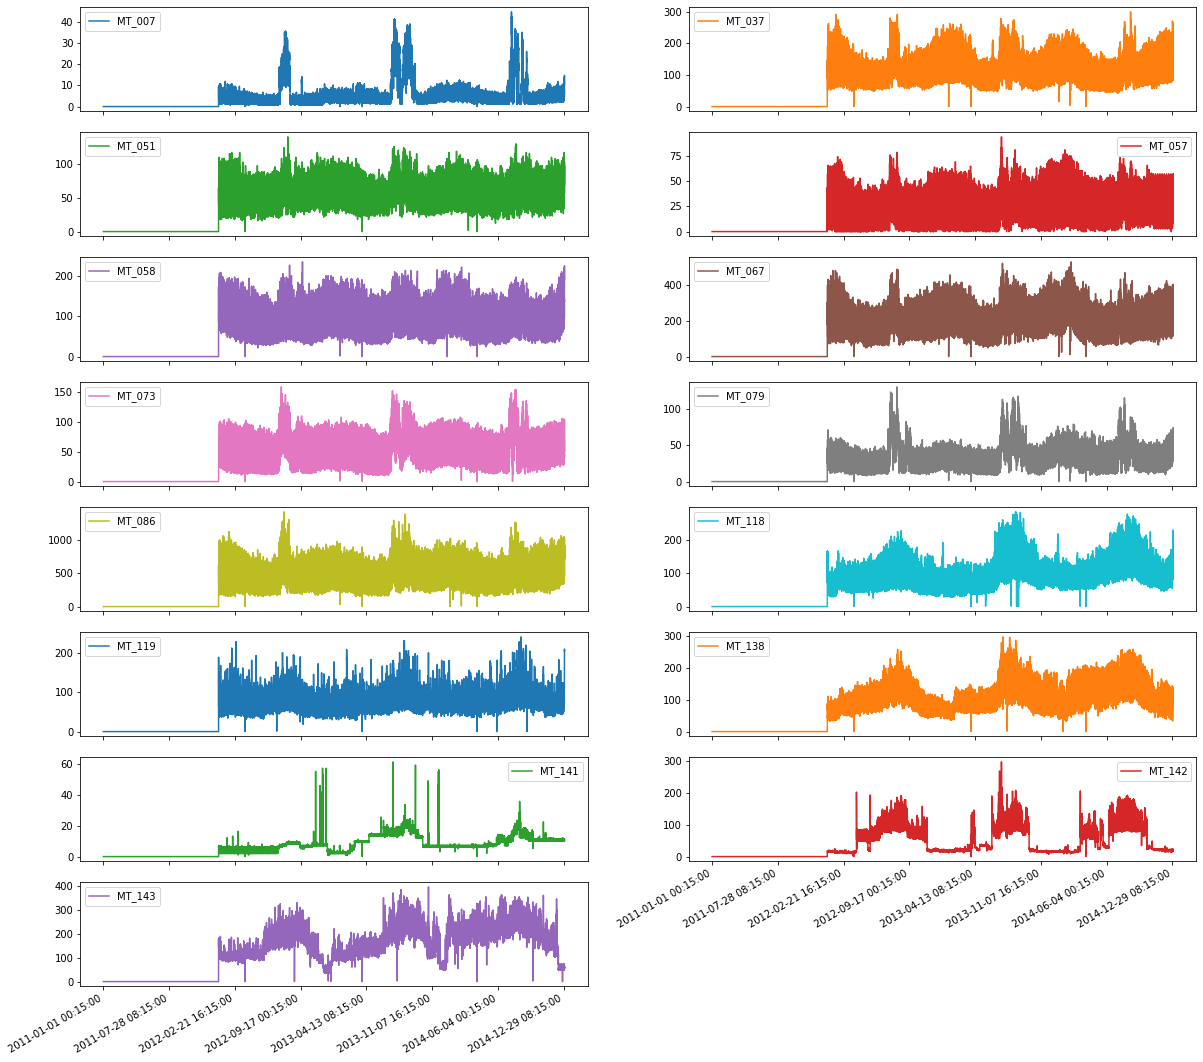

In [36]:
df[corr_dict['MT_007']].plot(subplots=True, layout=(-1, 2), figsize=(20,20))
plt.show()

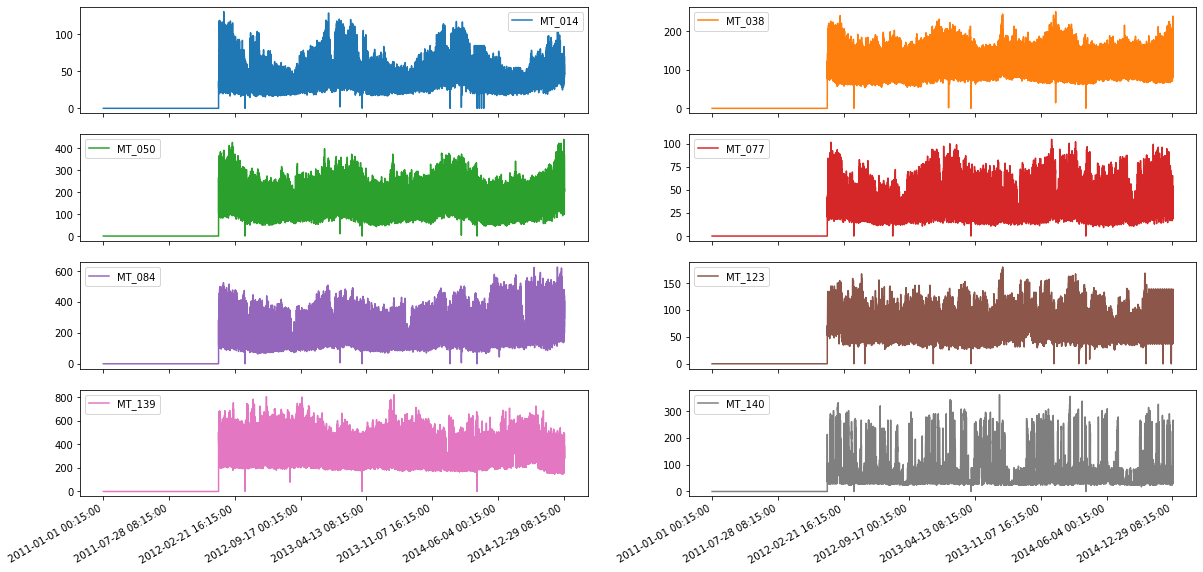

In [39]:
df[corr_dict['MT_140']].plot(subplots=True, layout=(-1, 2), figsize=(20,10))
plt.show()

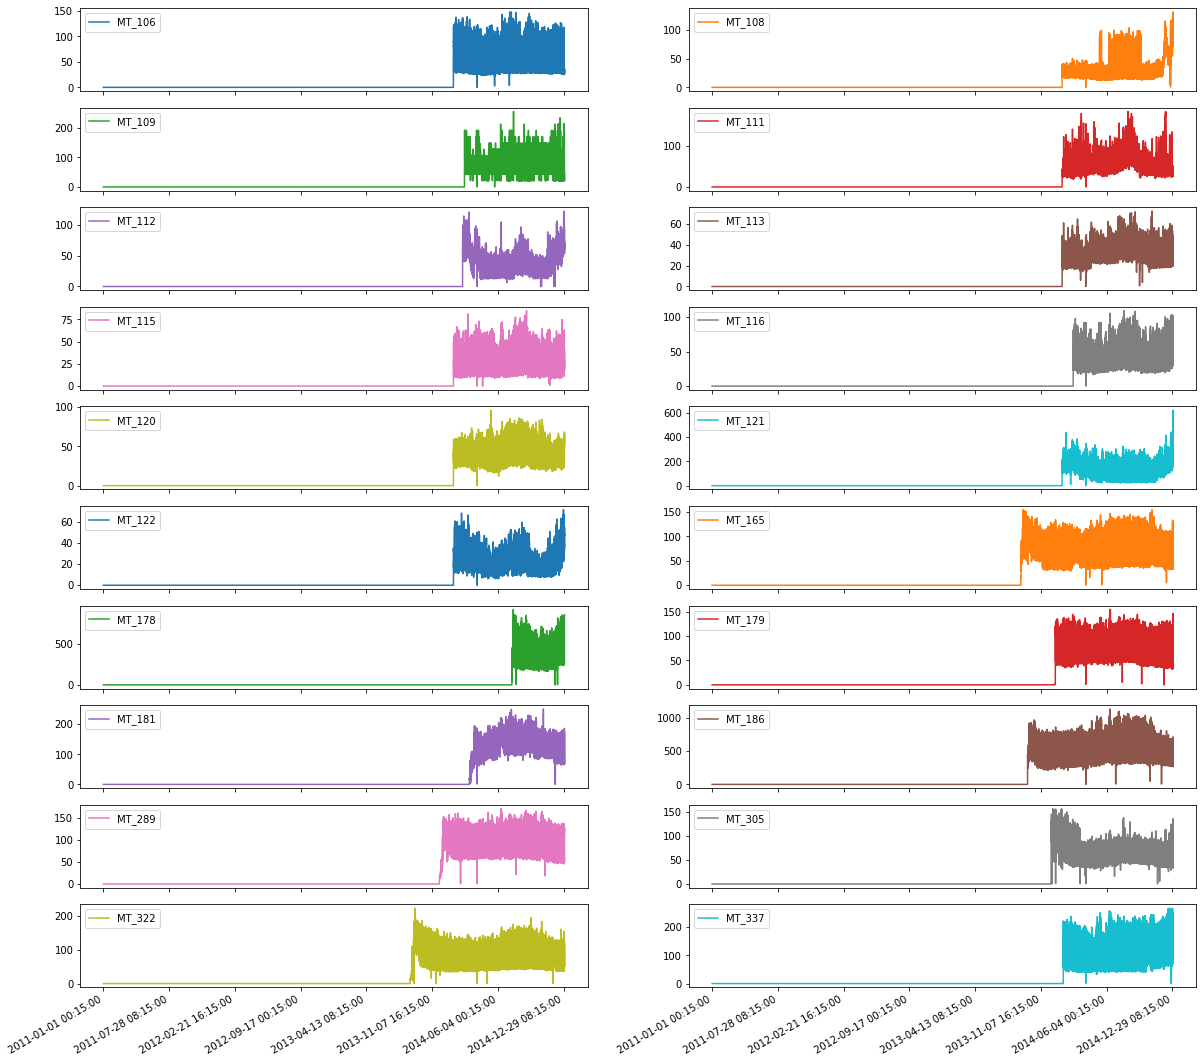

In [51]:
df[corr_dict['MT_178']].plot(subplots=True, layout=(-1, 2), figsize=(20,20))
plt.show()

## t-SNE plot

In [5]:
def plot_tsne(df, perplexity=30, n_iter=1000):
    tsne = TSNE(n_components=2, random_state = 0, perplexity=perplexity, n_iter=n_iter, n_jobs=-1)
    df_emb = tsne.fit_transform(df.T)
    
    plt.scatter(df_emb[:, 0], df_emb[:, 1])

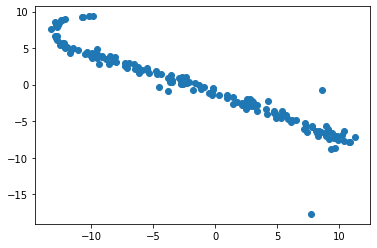

In [16]:
zero_index = (df[df_150_group].sum(axis=1) == 0)
plot_tsne(df.loc[~zero_index, df_150_group])

In [ ]:
zero_index = (df[df_35000_group].sum(axis=1) == 0)
plot_tsne(df.loc[~zero_index, df_35000_group])

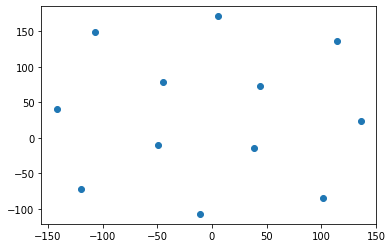

In [15]:
zero_index = (df[df_35000_group].sum(axis=1) == 0)
plot_tsne(df.loc[~zero_index, df_106000_group])